## RDD - Resilient Distributed Dataset

#### RDDs are schemaless(but can handle structured and unstructered data) immutable JVM objects
#### RDDS are broken down into chunks called partitions and each of the executor recieves a chunk of it


#### Ideally, there are two ways of creating RDDs, 
#### 1. By parallelizing a collection i.e. a list or tuple
#### 2. By reading from File
#### But, if you are using dataframe and want to obtain a dataframe out of it, then you can use the command dataframe.rdd

In [1]:
### Parallelize using a tuple
rdd1 = sc.parallelize((1,2,3,4,5,6,7,8,9,10),3) #### sc is the object of spark context and used as the entry point to spark cluster and 3 is the number of partitions we want to create
rdd1.take(2)

[1, 2]

In [2]:
### Parallelize using a List
rdd2 = sc.parallelize([1,2,3,4,5,6,7,8,9,10],3)
#####spark context is a client that establishes connection to the spark cluster and we can also mention the appName, through which we can monitor the job with following app name on spark web UI
rdd2.take(3)

[1, 2, 3]

#### sc is by default defined in Notebooks, so the sc should not be redefined as sc = sparkContext(), but if you are not sure whether sc has been defined or not you can always initialize it to sc = SparkContext.getOrCreate()

### Creation of RDDs from reading of files

In [3]:
from pyspark.sql import HiveContext

In [4]:
rdd_from_file = sc.textFile('../dataset/sales_order.csv', 4)#### Reading a file present in dataset folder

## Lazy Evaluation
#### In spark, whenever we write a tranformation statement, it only checks the syntax and does not execute, it only executes only when we give an Action based command


In [5]:
from IPython.display import Image

In [6]:
spark = SparkSession.builder.appName("Spark_Learning_App_Name").getOrCreate()
sc = spark.sparkContext
sqlContext = HiveContext(sc)

In [9]:
lazyRDD = sc.parallelize((1,2,3,4,"sas",6),3)
lazyRDD = lazyRDD.map(lambda x: x+1)
lazyRDD.take(2)

[2, 3]

In [10]:
lazyRDD.take(8)

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 12.0 failed 1 times, most recent failure: Lost task 1.0 in stage 12.0 (TID 16, localhost, executor driver): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 230, in main
    process()
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 225, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 372, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark/python/pyspark/rdd.py", line 1371, in takeUpToNumLeft
    yield next(iterator)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-9-ab803a3d39f1>", line 2, in <lambda>
TypeError: must be str, not int

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:298)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:438)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:421)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:252)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:149)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:149)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:149)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 230, in main
    process()
  File "/opt/spark/python/lib/pyspark.zip/pyspark/worker.py", line 225, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 372, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/spark/python/pyspark/rdd.py", line 1371, in takeUpToNumLeft
    yield next(iterator)
  File "/opt/spark/python/lib/pyspark.zip/pyspark/util.py", line 55, in wrapper
    return f(*args, **kwargs)
  File "<ipython-input-9-ab803a3d39f1>", line 2, in <lambda>
TypeError: must be str, not int

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:298)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:438)
	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRunner.scala:421)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:252)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator$class.foreach(Iterator.scala:893)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable$class.$plus$plus$eq(Growable.scala:59)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:104)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:48)
	at scala.collection.TraversableOnce$class.to(TraversableOnce.scala:310)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toBuffer(TraversableOnce.scala:302)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce$class.toArray(TraversableOnce.scala:289)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:149)
	at org.apache.spark.api.python.PythonRDD$$anonfun$3.apply(PythonRDD.scala:149)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.SparkContext$$anonfun$runJob$5.apply(SparkContext.scala:2074)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:87)
	at org.apache.spark.scheduler.Task.run(Task.scala:109)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:345)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more


### In the above example we see that the RDD does not execute on entire upon action commands but executes partially, this behaviour of not executing at a time is known as lazy evaluation

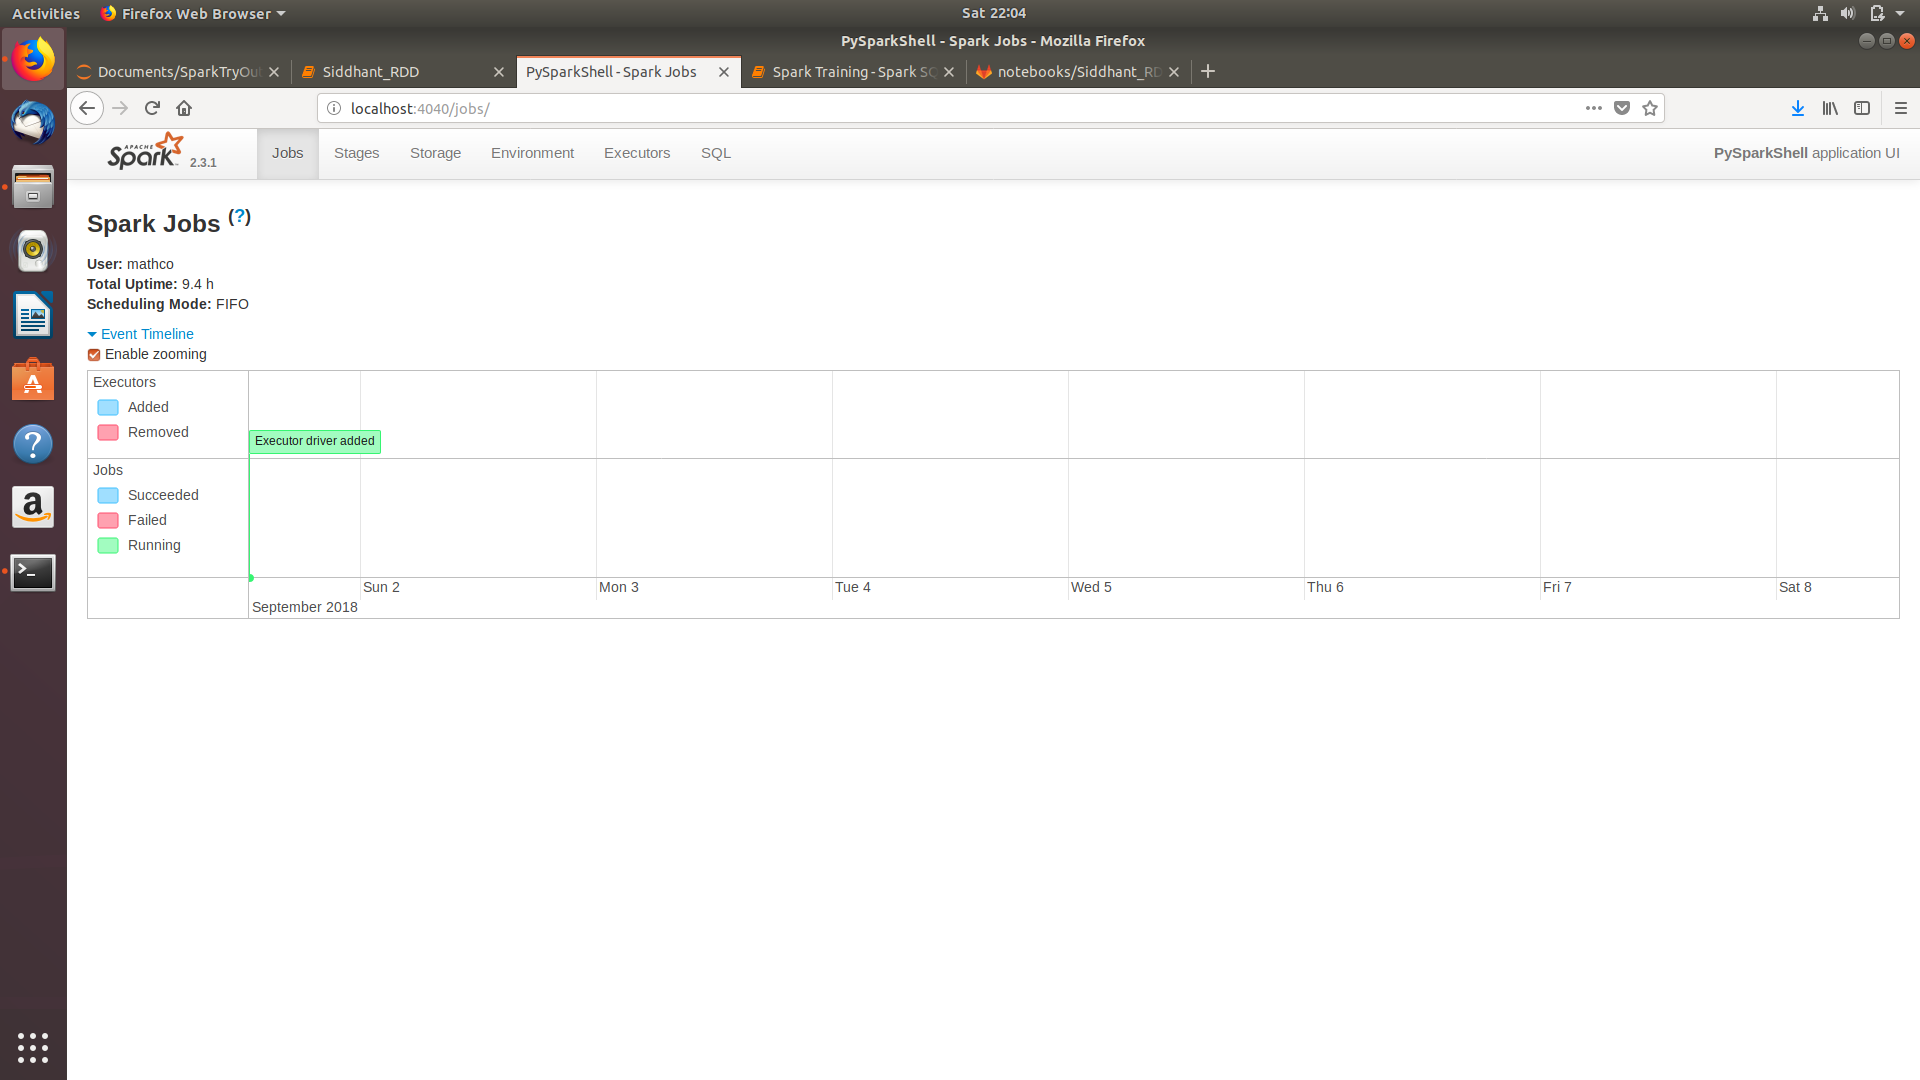

In [18]:
Image('../images/Job_is_Running.png')

## Creating Partitions

In [11]:
sc.parallelize((1,2,3, "sas",4,5,6),3).take(7)

[1, 2, 3, 'sas', 4, 5, 6]

#### In order to run processes parallely, we create partiotions, we divide the data across multiple nodes

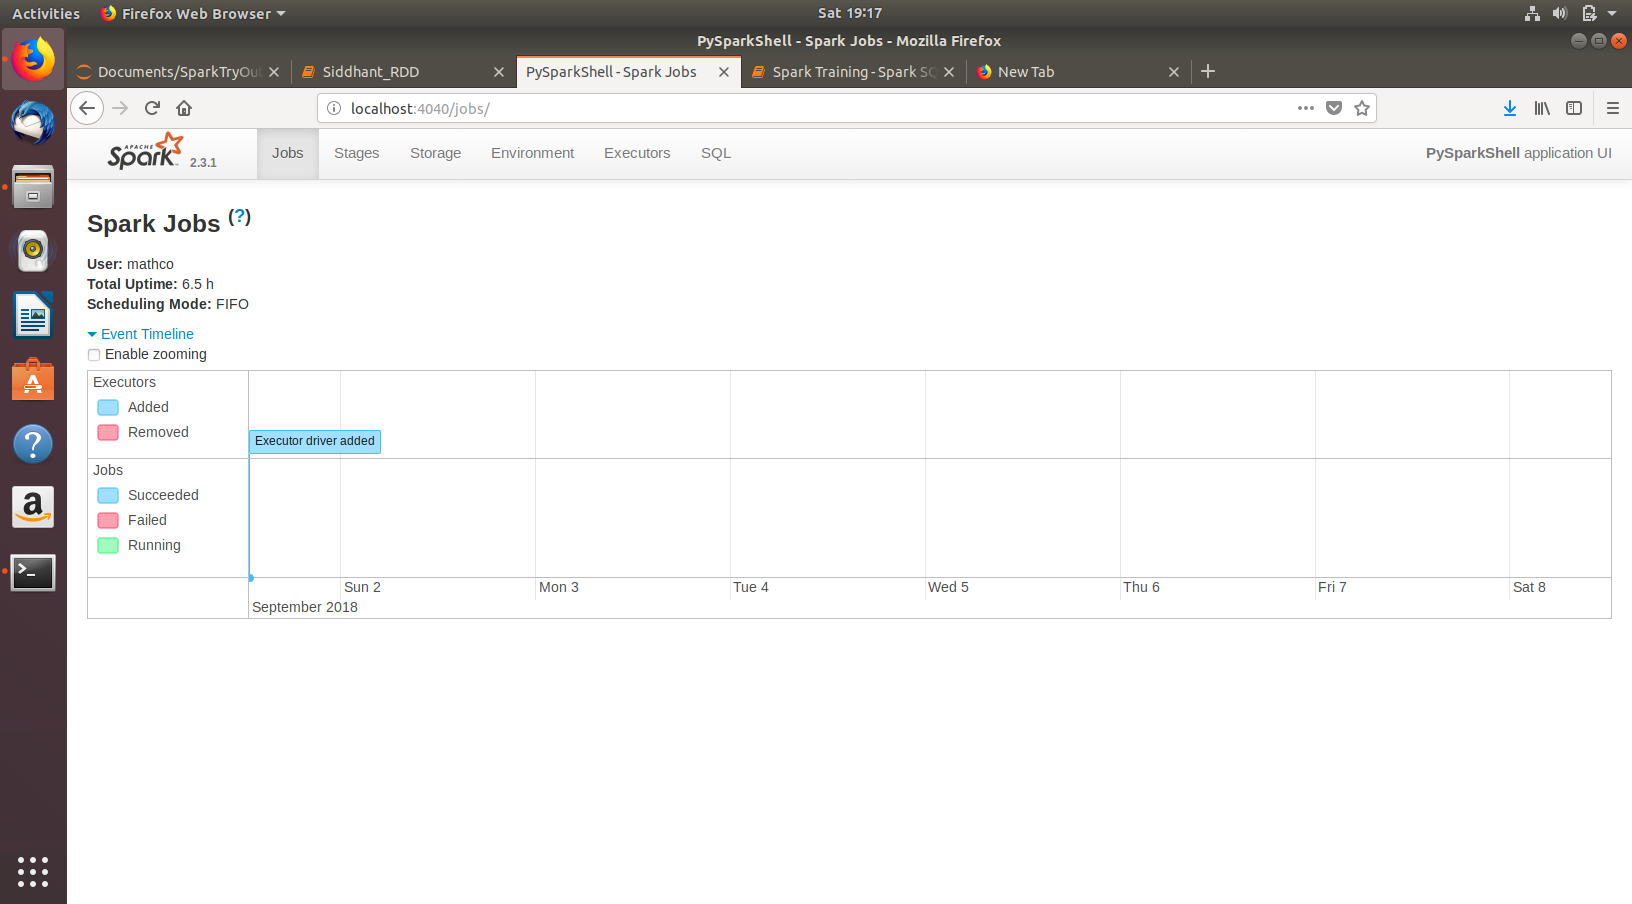

In [8]:
Image('../images/Job_Succedded.png')

## range()
#### Similar to range() in python the range() works simillar but here there is an extra parameter that can be included i.e. numSlices which defines the number of partitons

In [9]:
sc.range(start = 1, end = 7, step=2, numSlices = 3).collect()
# It is inclusive of start value and exclusive of end value and the numSlices says the number of partitions to be done

[1, 3, 5]

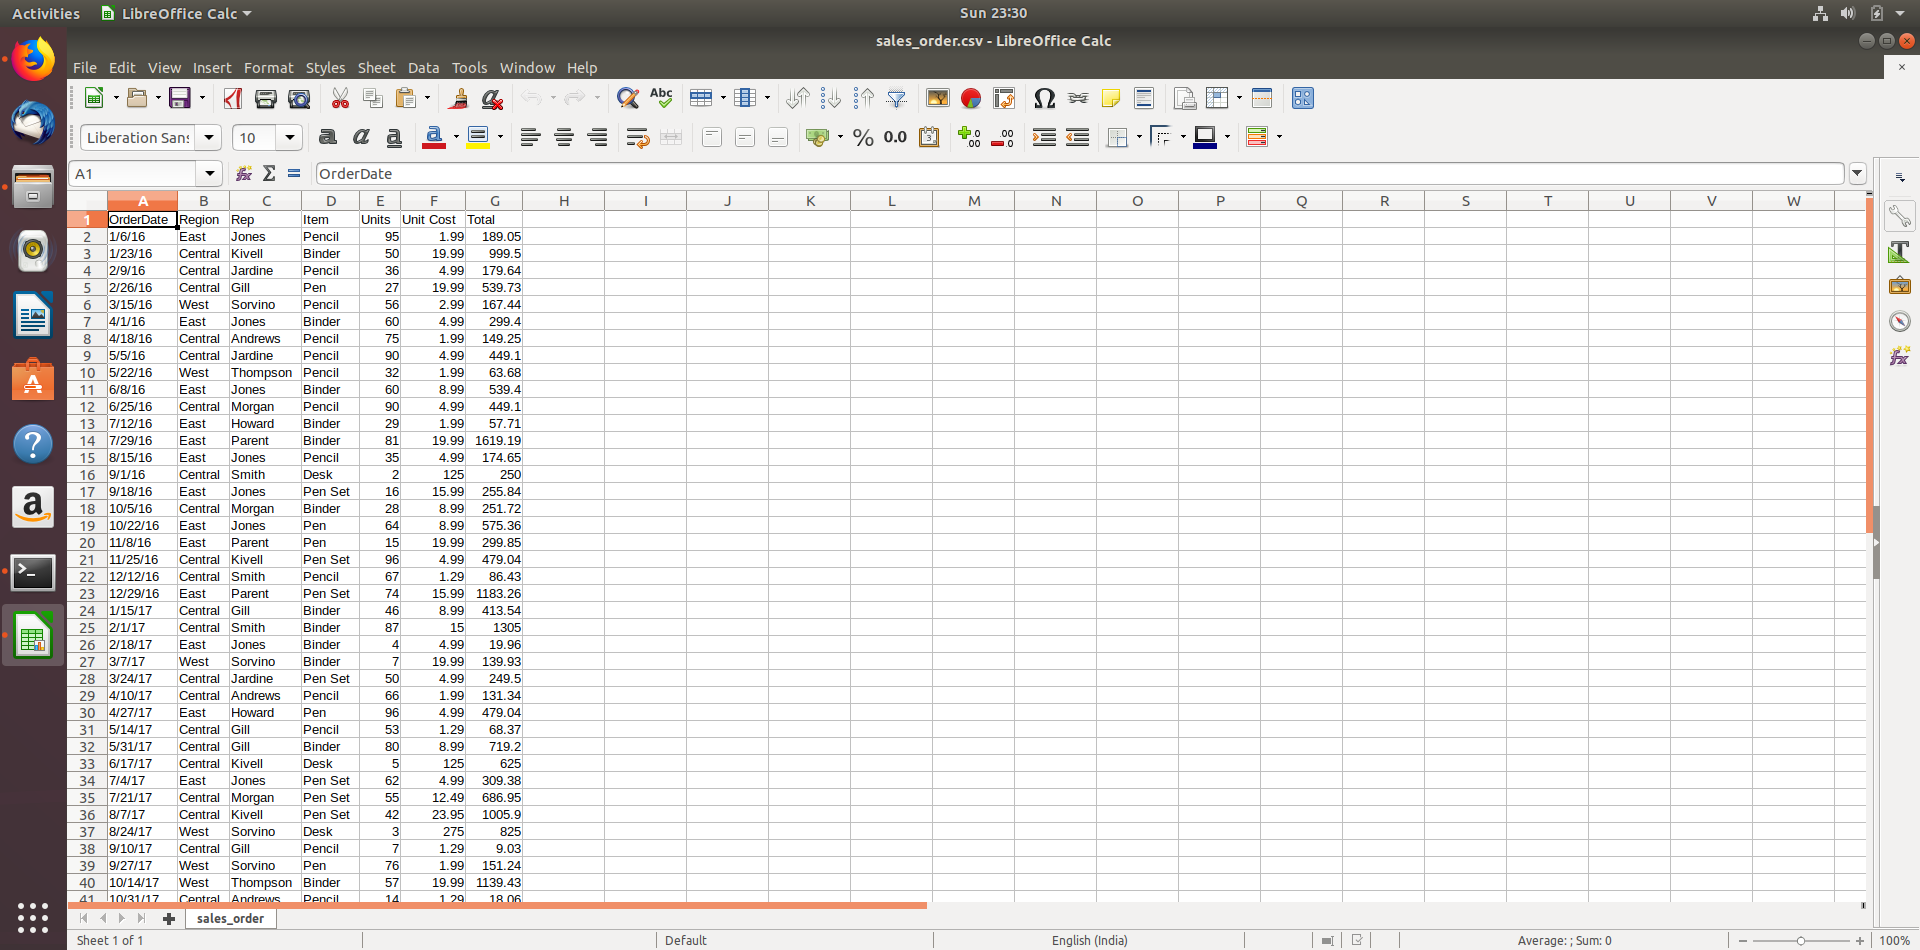

In [14]:
Image('../images/Dataset_Visualing.png')

## map()
#### Lambda is known as the anonymous function that is it does not have any name that comprises of single expression
#### Split is a function that is used to split a given string based upon the input(delimeter) you provide to the function
#### The following map function returns a rdd in list of list fashion

In [10]:
##In first line we select the rdd and in second statement we use the map command that iterates over each row and applies the function name passed to it or function defined to it
rdd_from_file\
.map(lambda x: x.split(','))\
.take(5)

[['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Cost', 'Total'],
 ['1/6/16', 'East', 'Jones', 'Pencil', '95', ' 1.99 ', ' 189.05 '],
 ['1/23/16', 'Central', 'Kivell', 'Binder', '50', ' 19.99 ', ' 999.50 '],
 ['2/9/16', 'Central', 'Jardine', 'Pencil', '36', ' 4.99 ', ' 179.64 '],
 ['2/26/16', 'Central', 'Gill', 'Pen', '27', ' 19.99 ', ' 539.73 ']]

## flatMap()

#### It works similar to map(), but it is helpful when we map from one to many elements,
#### it also flattens the file

In [13]:
rdd_from_file\
.flatMap(lambda x: x.split(','))\
.take(21)

['OrderDate',
 'Region',
 'Rep',
 'Item',
 'Units',
 'Unit Cost',
 'Total',
 '1/6/16',
 'East',
 'Jones',
 'Pencil',
 '95',
 ' 1.99 ',
 ' 189.05 ',
 '1/23/16',
 'Central',
 'Kivell',
 'Binder',
 '50',
 ' 19.99 ',
 ' 999.50 ']

## Count()
#### count number of elements in a rdd

In [15]:
rdd1.count()

10

## distinct()
#### Returns a rdd comprising of all distinct elements

In [21]:
rdd1.distinct().take(rdd1.count())

[3, 6, 9, 1, 4, 7, 10, 2, 5, 8]

## filter()
#### Retuns all values satisfying the condition

In [22]:
rdd1.filter(lambda x: x>=6 ).take(rdd1.count())

[6, 7, 8, 9, 10]

In [23]:
rdd1.histogram(4)

([1.0, 3.25, 5.5, 7.75, 10], [3, 2, 2, 3])